 Question 1:  What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

 Ans: Anomaly Detection is the process of finding out the datapoints which deviates significantly from the normal behaviour.

 Point Anomaly : A single data point that is significantly different from the normal data point

 Contextual Anomaly : A data point that is anomalous in a specific context but may be normal in other

 Collective Anomaly : A group of data points that together deviates from normal behaviour


Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.

Ans: Isolation Forest : Randomly isolates data point using tress. Use Case - Fraud Detection, System monitoring

DBSCAN : Groups data into dense cluster, outliers lies outside. Use Case - Image Segmentation, Spatial Data

Local Outlier Factor : Measure Local density deviation from the neighbours. Use Case - Network Behaviour

Question 3: What are the key components of a Time Series? Explain each with one
example.

Ans: Trend: A long term increase or decrease of data in a long period of time. Eg: The growing population since a decade

Seasonality: Regular and predictable pattern which repeats over a fixed period of time. Eg: The rise of airline booking in the month of december due to holidays

Cyclic Pattern: Flucatuation that occurs for longer and variable period. Eg: The fall of stock market after any war

Random Pattern: Unpredictable, short term fluctuation caused due to unforseen events. Eg: The temporary downfall of any airline when any unpredictable and hazardou

Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?

Ans: A stationary time series has constant statistical properties over time.

Transforming to a non-stationary series involves steps like differencing, detrending and many more.

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.

Ans: AR (AutoRegressive) : Predict future value using a linear combination of the past values. Application - Weather forecasting and stock price predictions

MA (q) : It predict using the errors made in the previous forecasts. Application - To reduce outliers and noise

ARIMA : It adds differencing to remove the trends and make the data stationary. Application - Economic Indicator

SARIMA : Adds seasonal components with seasonal components, with seasonal orders and seasonal length. Application - Retail Sales

SARIMAX : Extends SARIMA by using additional variable x that influence the target series. Application - Sales with promotions

Saving AirPassengers.csv to AirPassengers (4).csv
     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


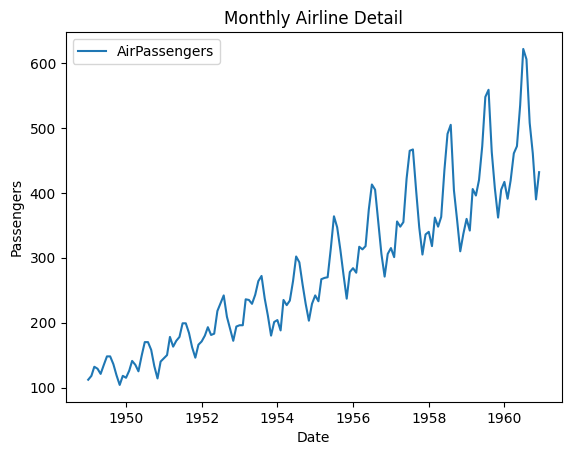

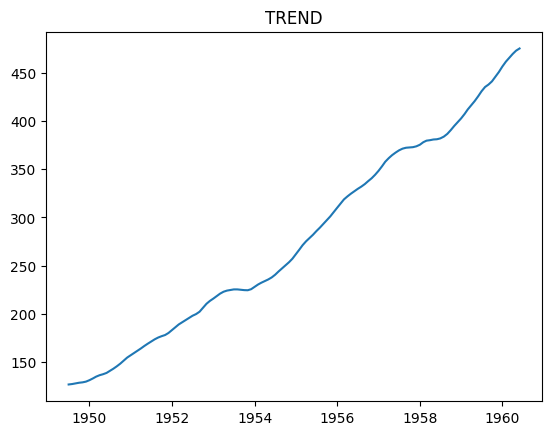

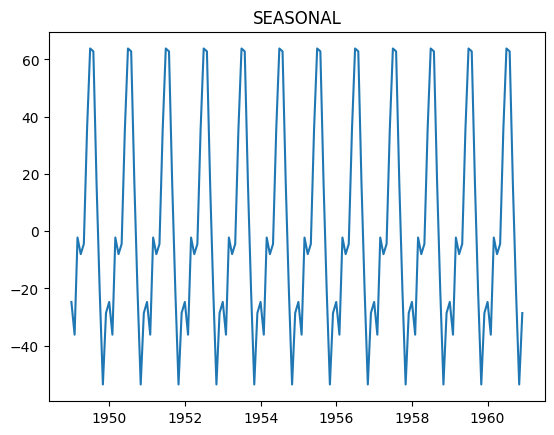

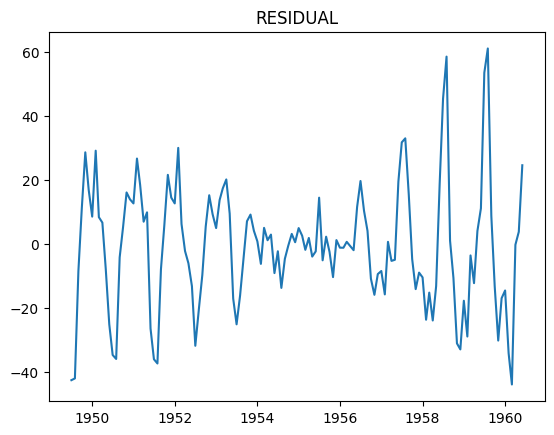

In [6]:
"""Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components """


import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

df = files.upload()

for filename in uploaded:
    df = pd.read_csv("AirPassengers.csv")

print(df.head(5))
df["Month"] = pd.to_datetime(df["Month"])
print(df.info())
df.set_index("Month", inplace=True)

plt.plot(df["#Passengers"], label="AirPassengers")
plt.title("Monthly Airline Detail")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()


from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df["#Passengers"], model="Multiplication")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.plot(trend)
plt.title("TREND")
plt.show()

plt.plot(seasonal)
plt.title("SEASONAL")
plt.show()

plt.plot(residual)
plt.title("RESIDUAL")
plt.show()


In [ ]:
"""Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot. """

import pandas as pd
import matplotlib.pyplot as plt


df = files.upload()

for filename in uploaded:
    df = pd.read_csv("AirPassengers.csv")

df.head()

features = df[["fare_amount", "trip_distance"]].dropna()

from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.01, random_state=2)

features["anomaly_predict"] = iso_forest.fit_predict(features)

anomalies = features[features["anomaly_predict"] == -1]
normal = features[features["anomaly_predict"] == 1]

plt.scatter(normal["fare_amount"], normal["trip_distance"], label="Normal")
plt.scatter(anomalies["fare_amount"], anomalies["trip_distance"], label="Outliers", color='red')
plt.legend()
plt.xlabel("Fare Amount")
plt.ylabel("Distance Travelled")
plt.title("Isolation Forest Anomaly Detection")
plt.grid(True)
plt.show()



In [ ]:
"""Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results. """

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("AirPassengers.csv")
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)
df = df.asfreq("MS")
from statsmodels.tsa.statespace.sarimax import SARIMAX
df



model = SARIMAX(df["#Passengers"],
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot original and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df["#Passengers"], label="Observed")
plt.plot(predicted_mean, label="Forecast")
plt.title("SARIMA Forecast: AirPassengers")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()



In [ ]:
"""Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib. """

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("StudentsPerformance.csv")
df.head()
from sklearn.neighbors import LocalOutlierFactor

df = df[["reading score", "writing score"]]

lof = LocalOutlierFactor(contamination=0.01, n_neighbors=30)
df["Anomaly"] = lof.fit_predict(df)
normal = df[df["Anomaly"] == 1]
outlier = df[df["Anomaly"] == -1]
plt.scatter(normal["reading score"], normal["writing score"], label="Normal")
plt.scatter(outlier["reading score"], outlier["writing score"], label="Outliers")
plt.legend()
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.show()
